# Arkadiusz Pytlik

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [2]:
# wczytanie danych
df = pd.read_csv('data.csv', sep=',')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# sprawdzanie które kolumny mają dane tekstowe
categorical = [col for col in df.columns if df[col].dtype=='O']
print('Dane tekstowe zawierają kolumny :\n\n', categorical)

Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [4]:
# sprawdzenie kompletności danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [6]:
# częstotliwość wystąpień
for col in categorical:   
    print(df[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [7]:
# zmiana wartości ? na Nan
df = df.replace({" ?": np.nan})
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [8]:
# wstawienie najczęstszej wartości, tam gdzie brak danych
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [9]:
# podział na zbiory uczący i testowy
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# klasyfikacja danych

# model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predykcja
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Dokładność modelu: 0.7974

Confusion matrix:
 [[7041  366]
 [1613  749]]


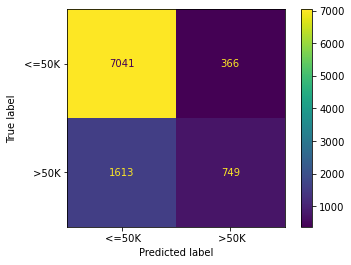


Prawdziwie pozytywne(TP) =  7041
Prawdziwie negatywne(TN) =  749
Fałszywie pozytywne(FP) =  366
Fałszywie negatywne(FN) =  1613


In [10]:
print('Dokładność modelu: {0:0.4f}\n'.format(accuracy_score(y_test, y_pred)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print('\nPrawdziwie pozytywne(TP) = ', cm[0,0])
print('Prawdziwie negatywne(TN) = ', cm[1,1])
print('Fałszywie pozytywne(FP) = ', cm[0,1])
print('Fałszywie negatywne(FN) = ', cm[1,0])

Model dość dobrze przyporządkowuje wartości pozytywne, natomiast słabo przyporządkowuje wartości negatywne.

In [11]:
# uczenie klasyfikatora dla kolumny race

# podział na zbiory uczący i testowy
X = df.drop(['race'], axis=1)
y = df['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# klasyfikacja danych

#model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predykcja
y_pred = gnb.predict(X_test)
y_pred

array([' White', ' White', ' White', ..., ' White', ' White', ' White'],
      dtype='<U19')

Dokładność modelu: 0.8479

Confusion matrix:
 [[   0    1    0    0   79]
 [   0    2    1    0  315]
 [   0    4   62    0  845]
 [   0    0    1    0   71]
 [   0   44  125    0 8219]]


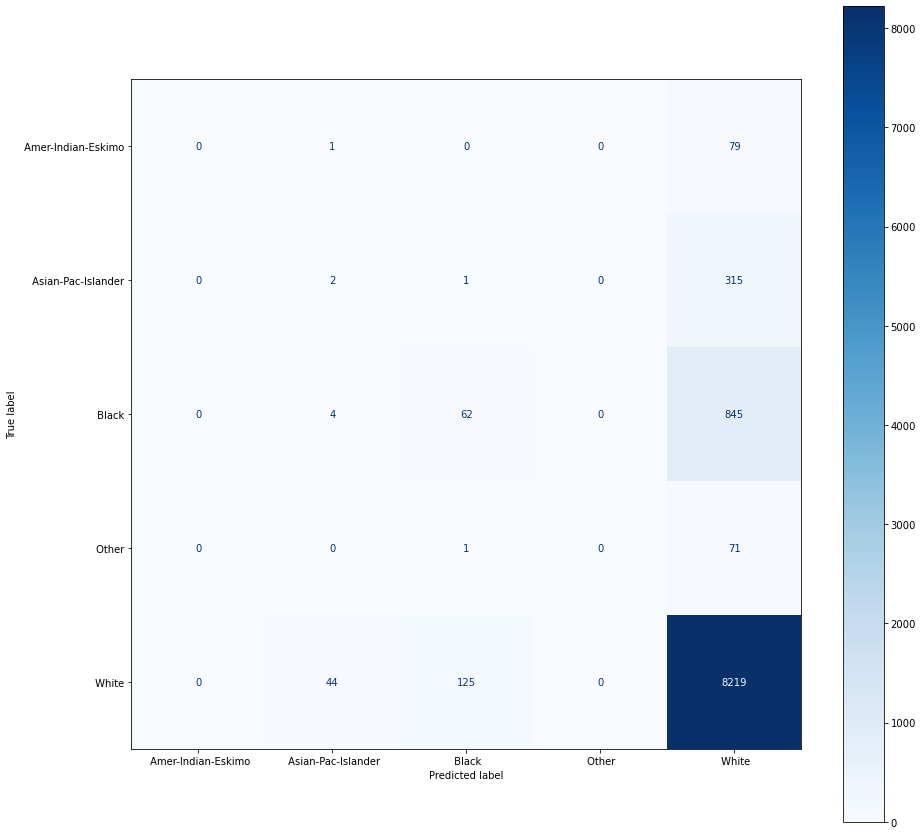

In [12]:
print('Dokładność modelu: {0:0.4f}\n'.format(accuracy_score(y_test, y_pred)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

Dokładność modelu jest wysoka, ale w rzeczywistości słabo radzi sobie z przyporządkowaniem odpowiedniej rasy. Prawie wszystkich przypisuje do białych, a z razcji, że w zestawie danych jest ich przeważająca ilość, ogólne dopasowanie wychodzi dobre. Jeżeli mielibyśmy dane, gdzie ilość osób z każdej rasy jest porównywalna, to uwidoczniły by się te mankamenty i wyliczona dokładność modelu również by zmalała.

In [13]:
#uczenie klasyfikatora dla kolumny native_country

# podział na zbiory uczący i testowy
X = df.drop(['native_country'], axis=1)
y = df['native_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# kodowanie zmiennych tekstowych na wartości liczbowe
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# klasyfikacja danych

#model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predykcja
y_pred = gnb.predict(X_test)
y_pred

array([' Hong', ' Hong', ' Hong', ..., ' United-States', ' Hong', ' Hong'],
      dtype='<U27')

Dokładność modelu: 0.0579

Confusion matrix:
 [[   0    0    0 ...    0    0    1]
 [   0    0    0 ...    1    0    4]
 [   0    0    0 ...    1    0    1]
 ...
 [   0    0    0 ...  556    0 1206]
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    1    0    1]]


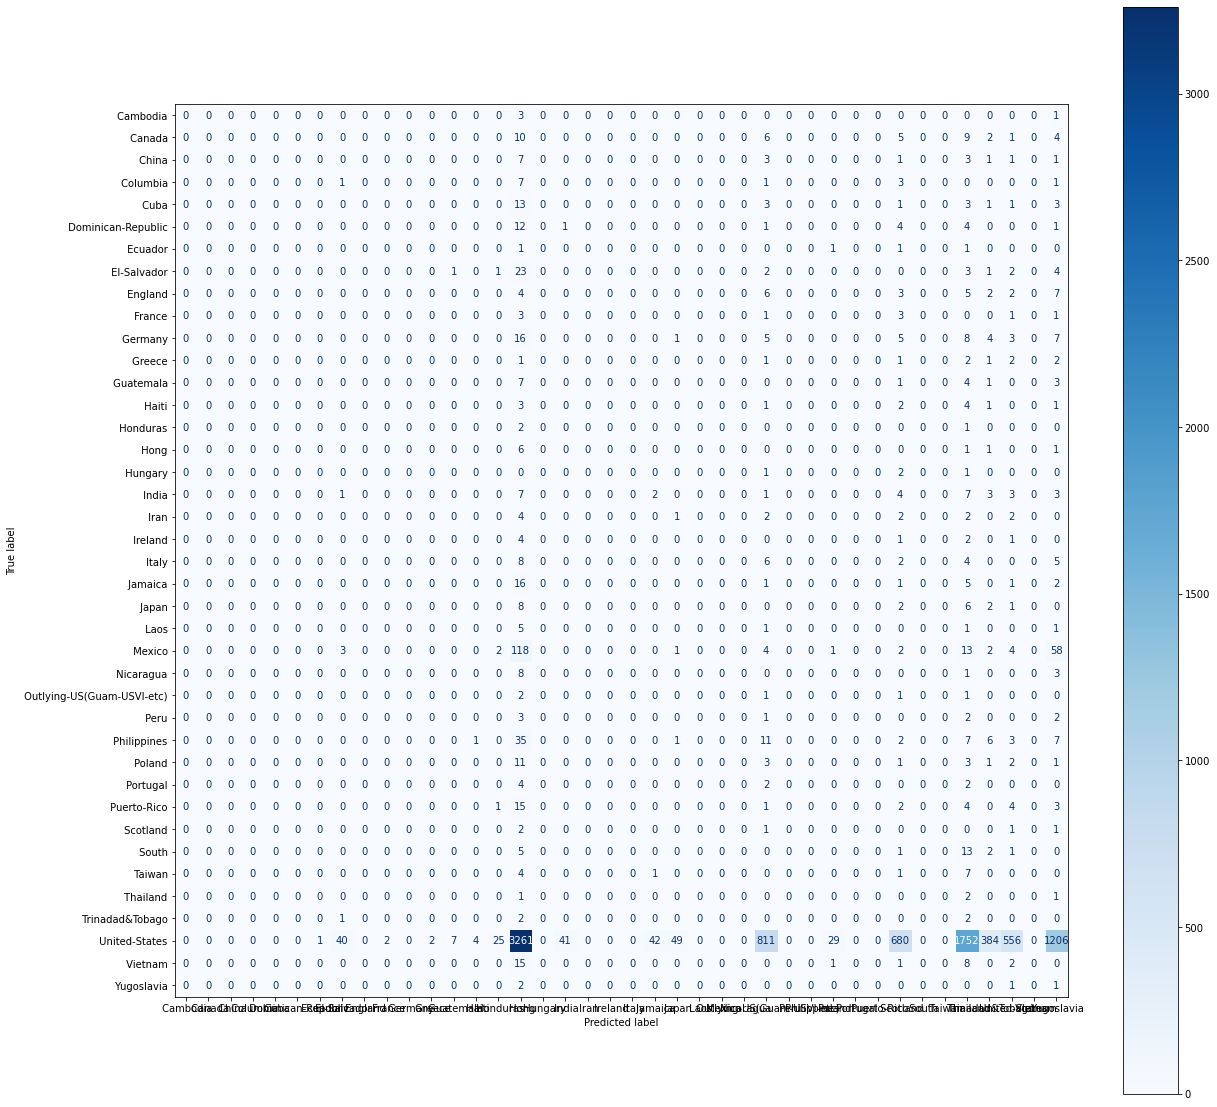

In [14]:
print('Dokładność modelu: {0:0.4f}\n'.format(accuracy_score(y_test, y_pred)))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)


fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

Dokładność modelu jest niska. Jakość modelu zależy od ilości klas, jakie może przyporządkować. Im więcej możliwych klas tym gorsza jakość.